In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

Random Sample Imputation on Numerical Data

In [4]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [5]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [7]:
X = df.drop(columns=['Survived'])
y = df['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [10]:
X_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


In [11]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [13]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()]

77    NaN
868   NaN
334   NaN
295   NaN
792   NaN
       ..
674   NaN
466   NaN
584   NaN
527   NaN
168   NaN
Name: Age_imputed, Length: 148, dtype: float64

In [14]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

C:\Users\mayank.agarwal1\AppData\Local\Temp\ipykernel_27780\3090101260.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()

In [16]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
# These are the 148 random values

array([61.  , 32.  , 60.  , 28.  , 21.  , 28.  , 38.  , 34.  , 51.  ,
       20.  , 23.  , 24.  , 54.  ,  4.  , 22.  , 38.  , 32.  , 23.  ,
       27.  , 29.  ,  5.  , 41.  , 34.  , 22.  ,  9.  , 19.  , 30.  ,
       20.  , 25.  , 32.  , 21.  , 33.  , 22.  , 36.  , 14.  , 47.  ,
       45.  , 39.  , 23.  , 30.  , 21.  , 22.  , 19.  , 25.  , 48.  ,
       16.  , 29.  , 19.  , 58.  , 34.  , 60.  , 56.  , 58.  , 14.  ,
       19.  , 58.  , 45.  , 37.  , 28.  , 40.  ,  3.  , 17.  , 15.  ,
       35.  , 31.  , 42.  , 34.  , 33.  , 22.  , 35.  , 35.  ,  0.83,
       24.  , 37.  , 26.  , 35.  , 47.  , 45.  , 22.  , 45.  ,  0.75,
       48.  , 16.  , 45.  , 33.  , 28.  , 50.  , 40.  , 19.  , 18.  ,
       31.  , 34.  , 28.  , 34.  , 47.  , 21.  , 24.  , 62.  , 36.  ,
       24.  , 25.  , 17.  ,  1.  , 54.  , 27.  , 18.  , 42.  , 71.  ,
       36.  , 34.  , 22.  , 39.  , 35.  , 28.  ,  9.  , 18.  , 20.  ,
       16.  , 24.  , 22.  , 27.  , 18.  , 43.  ,  6.  , 26.  ,  7.  ,
        9.  , 19.  ,

In [17]:
X_train['Age'].isnull().sum()

np.int64(148)

In [18]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,38.0
493,71.0,49.5042,71.0
527,NaN,221.7792,39.0


C:\Users\mayank.agarwal1\AppData\Local\Temp\ipykernel_27780\2642582470.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'],label='Original',hist=False)
C:\Users\mayank.agarwal1\AppData\Local\Temp\ipykernel_27780\2642582470.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  s

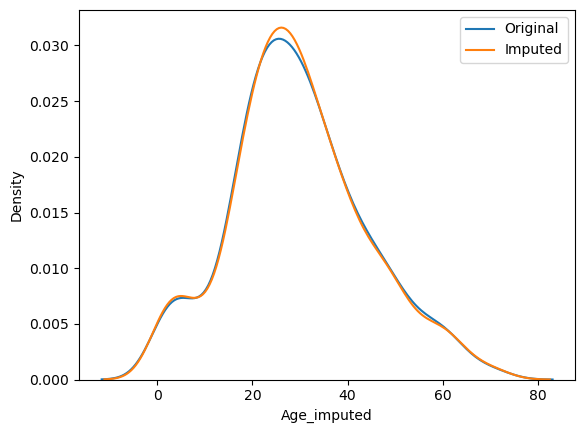

In [19]:
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)

plt.legend()
plt.show()

In [20]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.3495133904614
Variance after random imputation:  203.7123465033816


In [21]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,71.101649
Age,71.512440,204.349513,204.349513
Age_imputed,71.101649,204.349513,203.712347


<Axes: >

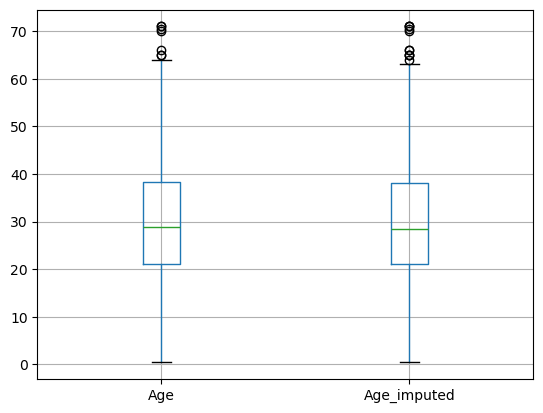

In [23]:
X_train[['Age', 'Age_imputed']].boxplot()
# not much effect on outliers

In [28]:
# when we are on prod , then make sure for same input value it will pick the same value 
# exam:-- fare is $100 and age is null so for 100$ it pick the age 35
# so on the prod when the next time fare will come as $100 then it will pick automatiicaly 35 on prod .

sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))

Random Sample Imputation on Catrgorical Data

In [29]:
data = pd.read_csv('house-train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [30]:

data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [31]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [32]:
X = data
y = data['SalePrice']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [33]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [34]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
90,NaN,TA,109900,TA,NaN
880,NaN,TA,157000,TA,NaN
1323,NaN,NaN,82500,NaN,NaN
600,Gd,TA,275000,TA,Gd
442,Gd,TA,162900,TA,Gd


In [35]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

C:\Users\mayank.agarwal1\AppData\Local\Temp\ipykernel_27780\856878696.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['

In [36]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [37]:
temp

,original,imputed
TA,0.951043,0.947774
Fa,0.037171,0.039384
Gd,0.009973,0.011130
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [38]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.655443
TA,0.412439,0.531987
Fa,0.040917,0.056117
Po,0.027823,0.034792
Ex,0.024550,0.032548


C:\Users\mayank.agarwal1\AppData\Local\Temp\ipykernel_27780\1827688635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
C:\Users\mayank.agarwal1\AppData\Local\Temp\ipykernel_27780\1827688635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwask

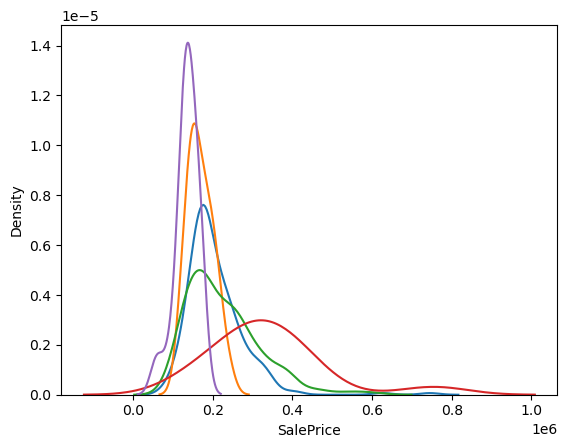

In [39]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()